In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [28]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [29]:
def check_columns(data):
    columns = data.columns
    for column in columns:
        #data[column].apply(changeNa)
        print("Column : " + str(column))
        print("Unique : " + str(len(data[column].unique())))
        print("Number NAN :" + str(data[column].isna().sum()))
        
check_columns(data)

Column : ID
Unique : 7728394
Number NAN :0
Column : Source
Unique : 3
Number NAN :0
Column : Severity
Unique : 4
Number NAN :0
Column : Start_Time
Unique : 6131796
Number NAN :0
Column : End_Time
Unique : 6705355
Number NAN :0
Column : Start_Lat
Unique : 2428358
Number NAN :0
Column : Start_Lng
Unique : 2482533
Number NAN :0
Column : End_Lat
Unique : 1568173
Number NAN :3402762
Column : End_Lng
Unique : 1605790
Number NAN :3402762
Column : Distance(mi)
Unique : 22382
Number NAN :0
Column : Description
Unique : 3761579
Number NAN :5
Column : Street
Unique : 336307
Number NAN :10869
Column : City
Unique : 13679
Number NAN :253
Column : County
Unique : 1871
Number NAN :0
Column : State
Unique : 49
Number NAN :0
Column : Zipcode
Unique : 825095
Number NAN :1915
Column : Country
Unique : 1
Number NAN :0
Column : Timezone
Unique : 5
Number NAN :7808
Column : Airport_Code
Unique : 2046
Number NAN :22635
Column : Weather_Timestamp
Unique : 941332
Number NAN :120228
Column : Temperature(F)
Uniq

In [30]:
def getCategoricalColumn(data):
    columns = []
    for column in data.columns:
        tempData = data[column].dropna()    
        random_sample = tempData.sample(1)
        if isinstance(random_sample.item(), str):
            columns.append(column)
    return columns
categoricalColumns = getCategoricalColumn(data)
categoricalColumns

['ID',
 'Source',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [31]:
moreThan100Nan = []
for column in categoricalColumns:
    if data[column].isna().sum() <= 1000000:
        
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        moreThan100Nan.append(column)

In [32]:
numerical_columns = data.select_dtypes(include=['int', 'float'])
for column in numerical_columns.columns:
    if data[column].isna().sum() <= 1000000:
        data[column].fillna(round(data[column].mean() ,2), inplace=True)

In [33]:
data.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    0
Street                         0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)            1999019
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)                0
Precipitation(in)        2203586
Weather_Condition              0
Amenity                        0
Bump      

In [34]:
data.drop(columns = ["End_Lat" ,"End_Lng" ,"Precipitation(in)" ,"Wind_Chill(F)" ,"Description"] ,inplace = True)
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,I-70 E,Dayton,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Brice Rd,Reynoldsburg,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,State Route 32,Williamsburg,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,I-75 S,Dayton,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Miamisburg Centerville Rd,Dayton,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,Pomona Fwy E,Riverside,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,I-8 W,San Diego,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,Garden Grove Fwy,Orange,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,San Diego Fwy S,Culver City,...,False,False,False,False,False,False,Day,Day,Day,Day


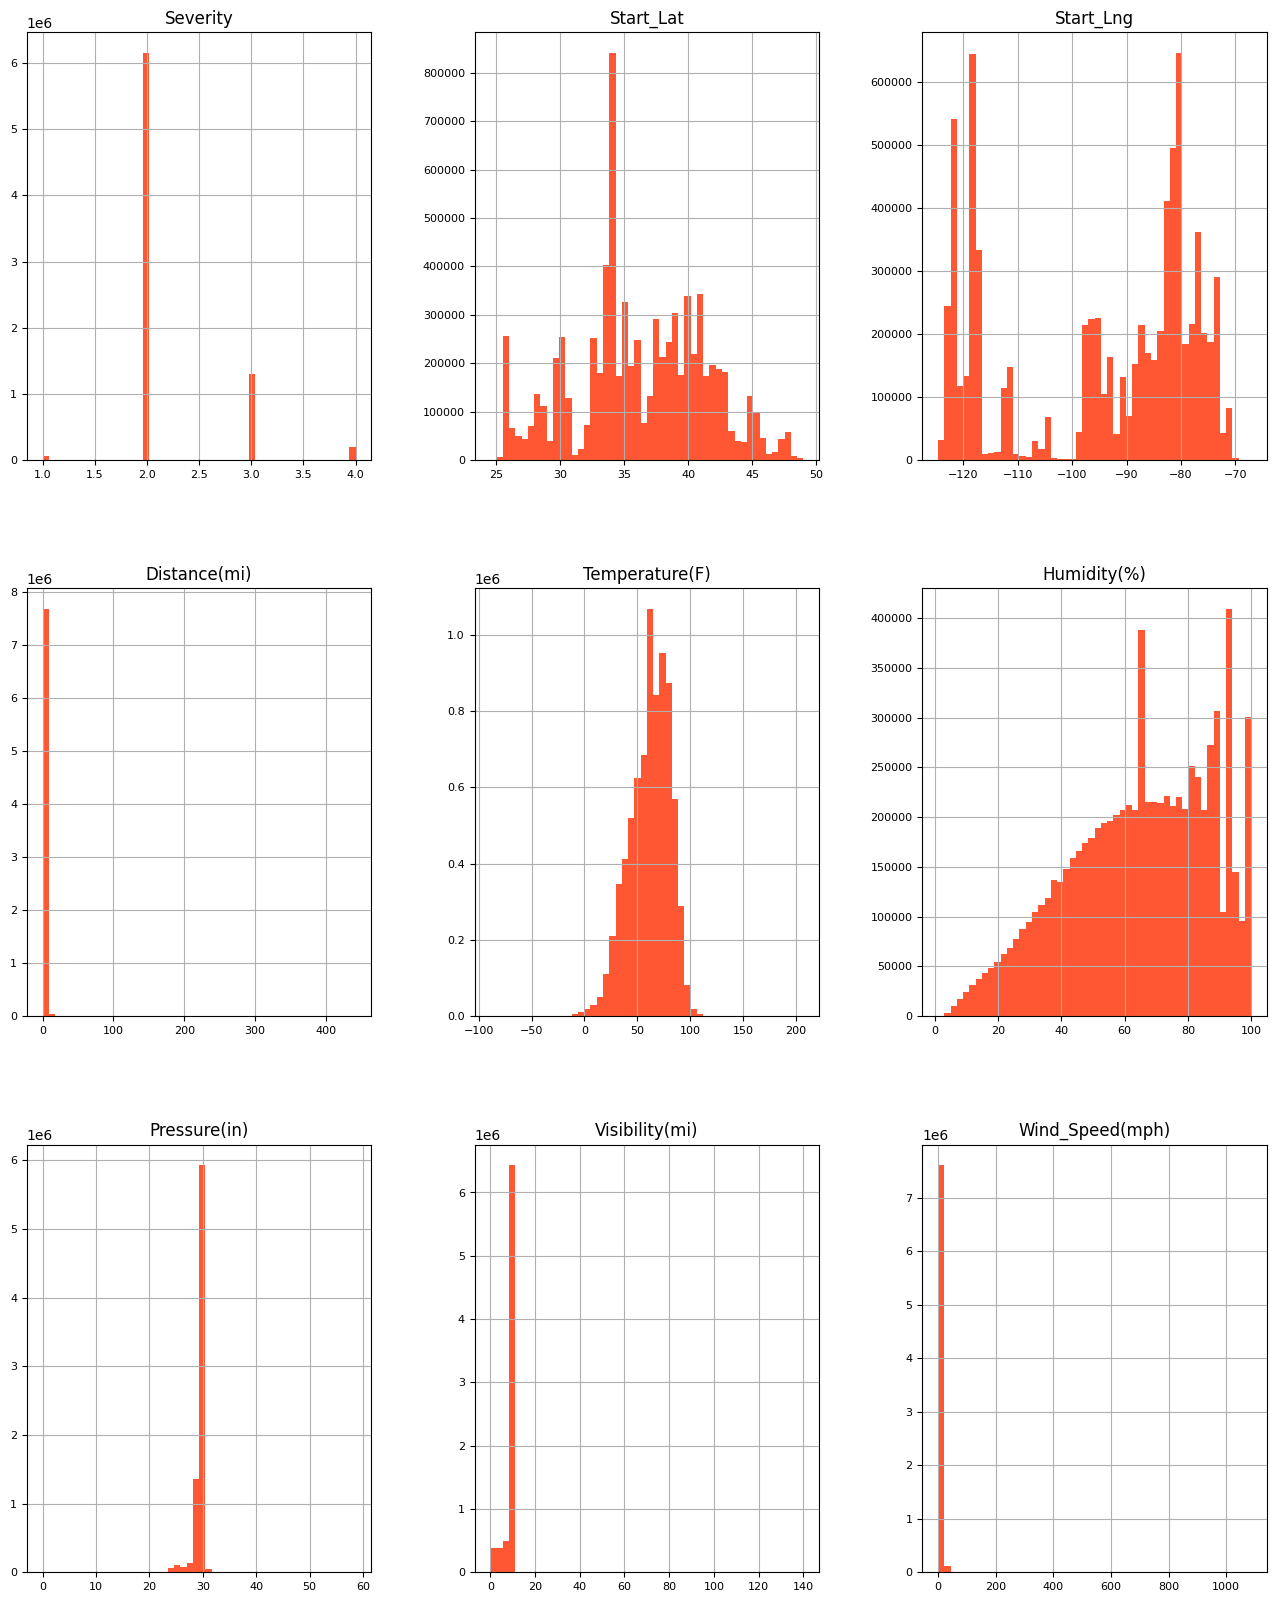

In [35]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8 ,color='#FF5733');

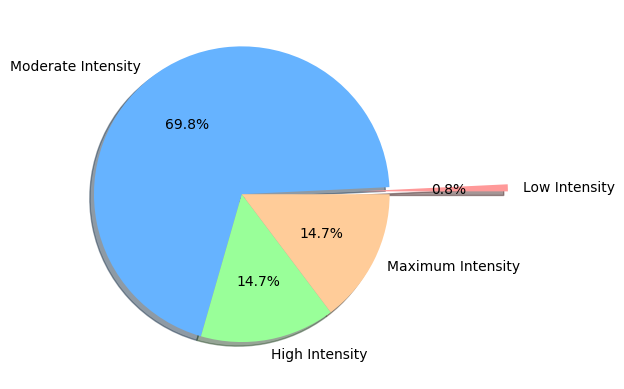

In [53]:
import matplotlib.pyplot as plt

Eastern = len(data[data.Severity == 1])
Pacific = len(data[data.Severity == 2])
Central = len(data[data.Severity == 3])
Mountain = len(data[data.Severity == 3])
values = [Eastern, Pacific, Central, Mountain]
labels = ['Low Intensity', 'Moderate Intensity', 'High Intensity', 'Maximum Intensity']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.8, 0, 0, 0)  # Adjust the explode values

plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)
plt.show()


In [70]:
temp = 
temp[0].hour

5

/tmp/ipykernel_32/1547815719.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Start_Time.dt.hour,bins=24)


<Axes: xlabel='Start_Time', ylabel='Density'>

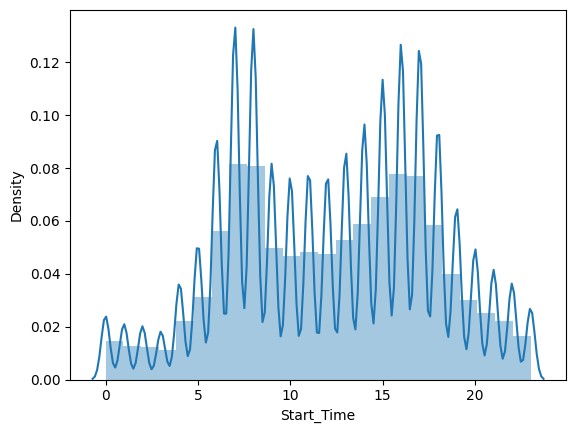

In [74]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
#data['End_Time'] = pd.to_datetime(data['End_Time'])
sns.distplot(data.Start_Time.dt.hour,bins=24)

/tmp/ipykernel_32/2897332472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Start_Time.dt.dayofweek,bins=7, kde=False,norm_hist=True)


<Axes: xlabel='Start_Time'>

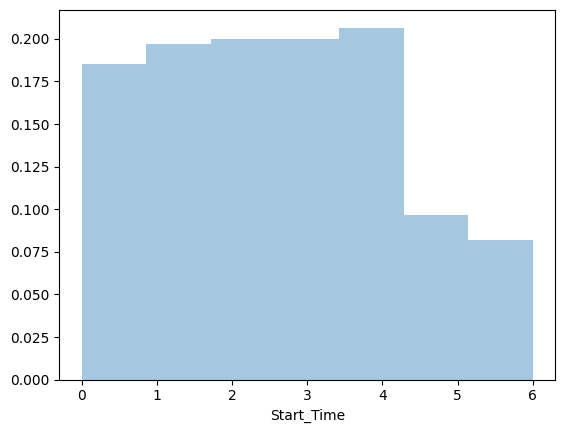

In [79]:
sns.distplot(data.Start_Time.dt.dayofweek,bins=7, kde=False,norm_hist=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Total accidents in 2021 1412433


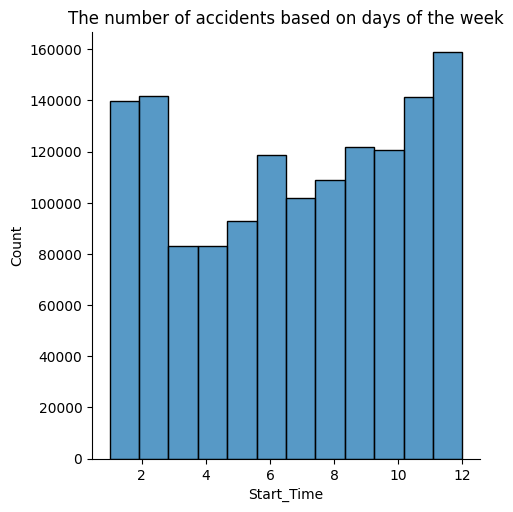

In [87]:
df_2021 = data[data.Start_Time.dt.year == 2021]
sns.displot(df_2021.Start_Time.dt.month,bins=12, kde=False)
plt.title('The number of accidents based on days of the week')
print("Total accidents in 2021",df_2021.Start_Time.dt.month.value_counts().sum())

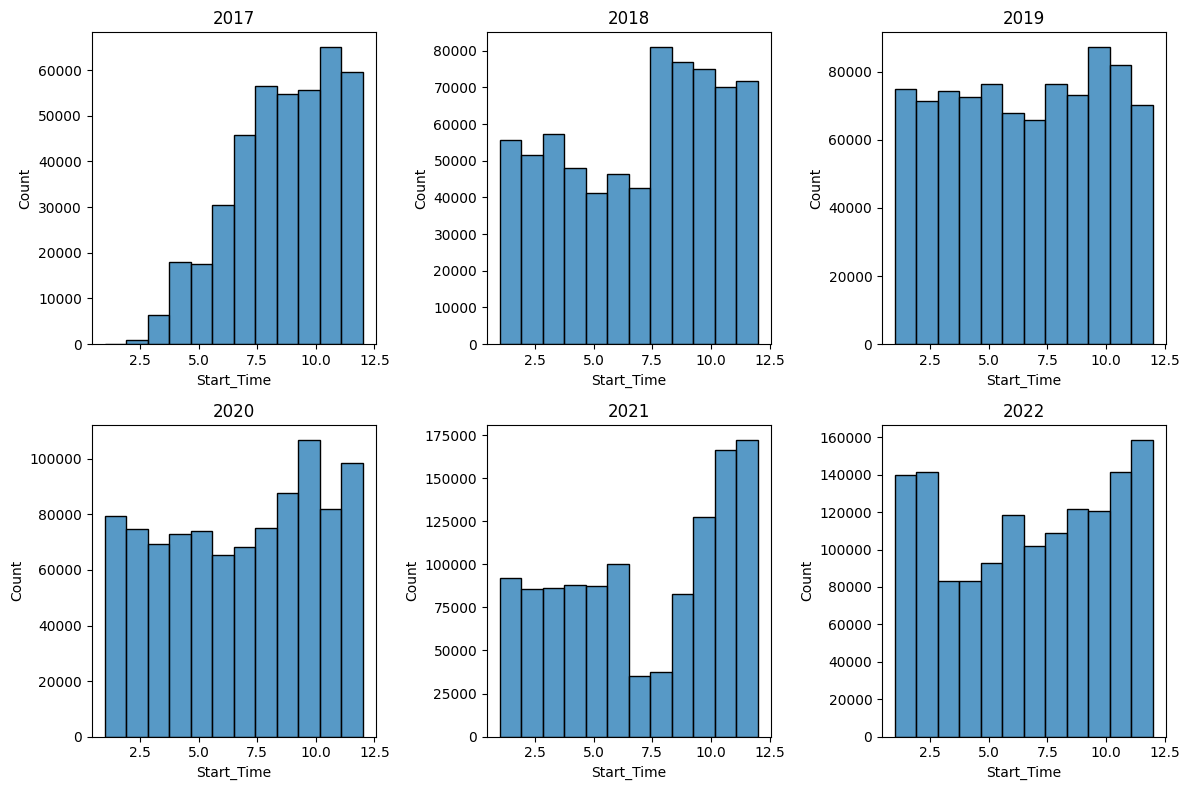

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate through each subplot and use the provided code
counter = 0

for i in range(2):
    for j in range(3):
        # Filter the data for the year 2021
        df = data[data.Start_Time.dt.year == 2016 + counter]
        counter += 1
        
        # Create a histogram for the data
        sns.histplot(df.Start_Time.dt.month, bins=12, kde=False, ax=axes[i, j])
        
        axes[i, j].set_title(2016 + counter)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


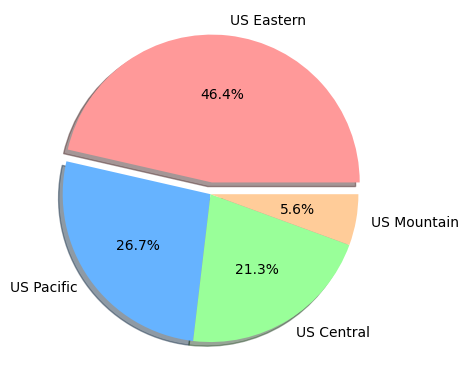

In [42]:
Eastern = len(data[data.Timezone == 'US/Eastern'])
Pacific = len(data[data.Timezone == 'US/Pacific'])
Central = len(data[data.Timezone == 'US/Central'])
Mountain = len(data[data.Timezone == 'US/Mountain'])
values=[Eastern,Pacific,Central,Mountain]
labels=['US Eastern','US Pacific','US Central','US Mountain']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(values,labels=labels,autopct='%1.1f%%',explode=(0.08,0,0,0),shadow=True,colors=colors)
plt.show()

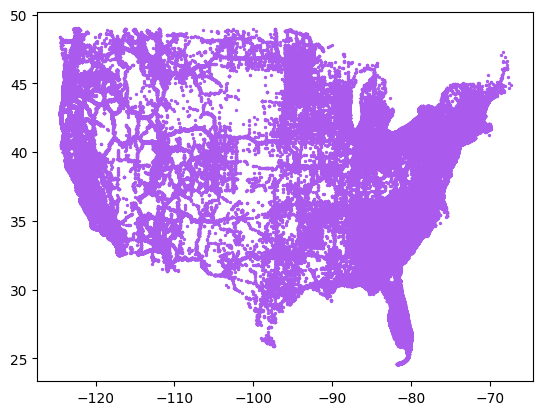

In [89]:
filtered_df_sample = data.sample(int(0.5 * len(data)))
plt.scatter(filtered_df_sample['Start_Lng'],filtered_df_sample['Start_Lat'],s=2,color='#aa5bee') 

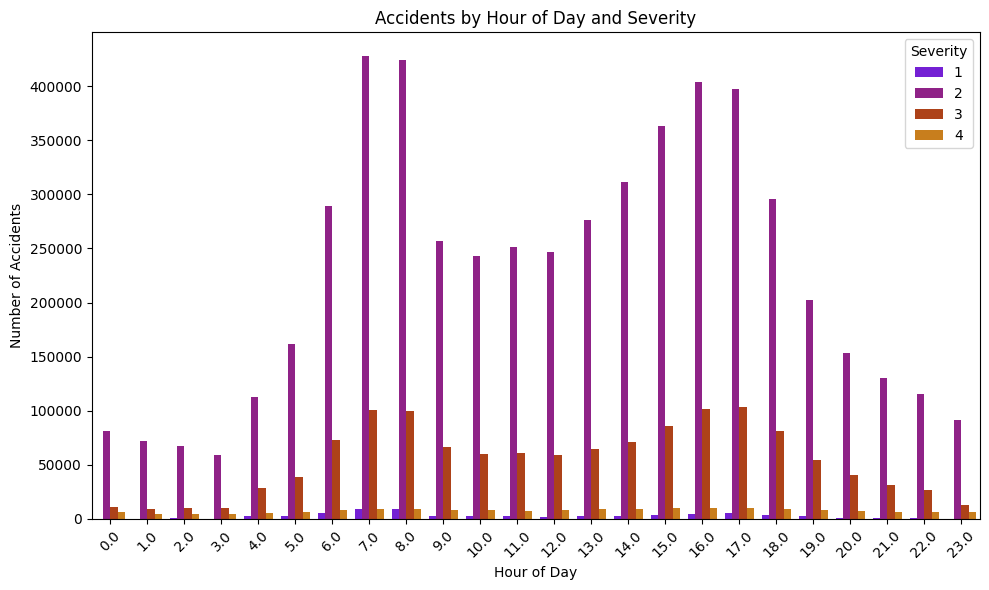

In [93]:
# Set chart style
#palette=sns.color_palette('gnuplot')
#sns.set(style="darkgrid", palette="gnuplot", context="notebook",)

# Extract hour of day from 'Start_Time'
data['Hour_of_Day'] = data['Start_Time'].dt.hour

# Create a new dataset with 'Severity' and 'Hour_of_Day' columns
severity_hour_dataset = data[['Severity', 'Hour_of_Day']].copy()

# Task 3: Create a Seaborn countplot to visualize accidents by hour and severity
plt.figure(figsize=(10, 6))
sns.countplot(data=severity_hour_dataset, x='Hour_of_Day', hue='Severity', palette='gnuplot')
plt.title('Accidents by Hour of Day and Severity')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<Axes: ylabel='City'>

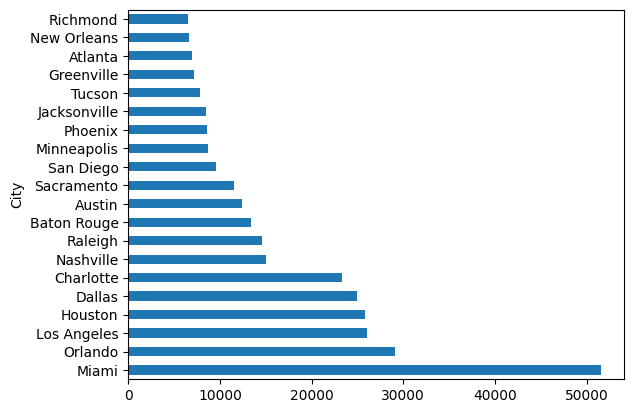

In [95]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:20].plot(kind='barh')

<Axes: ylabel='State'>

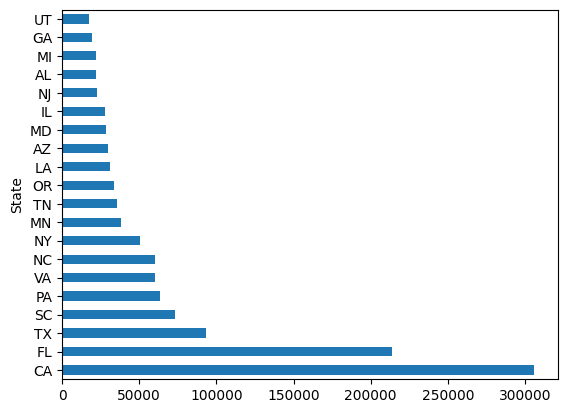

In [98]:
states_by_accidents = df.State.value_counts()
states_by_accidents[:20].plot(kind='barh')

In [99]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Hour_of_Day'],
      dtype='object')

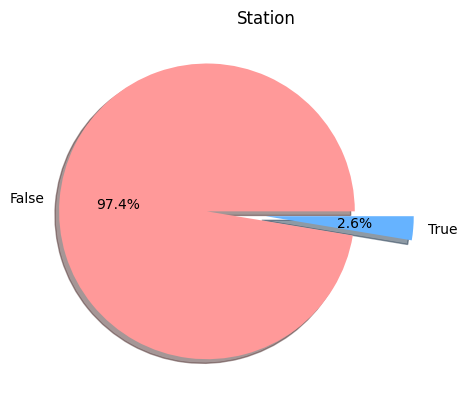

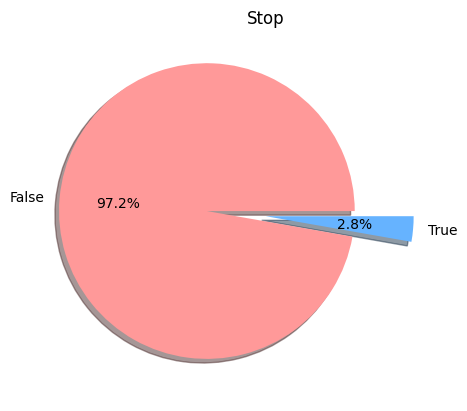

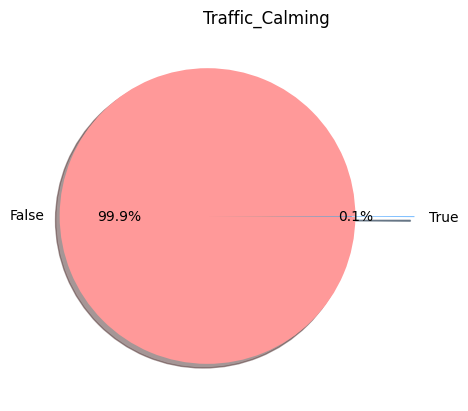

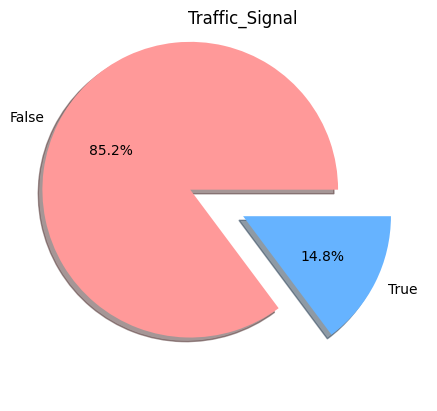

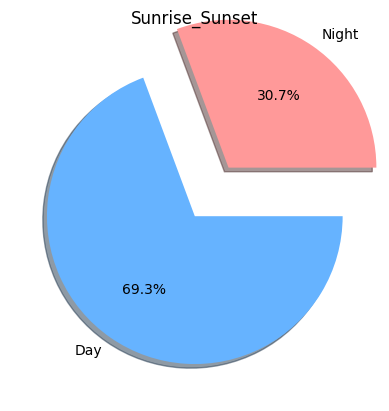

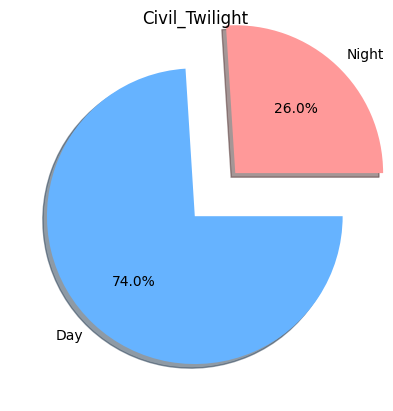

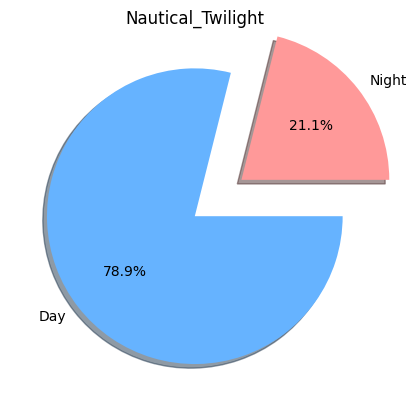

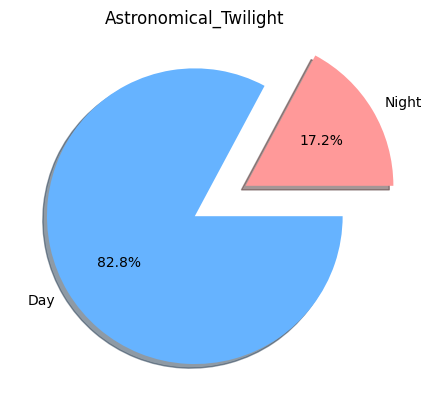

In [112]:
columns = ['Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']

for column in columns:
    try:
        un = data[column].unique()

        value1 = len(data[data[column] == un[0]])
        value2 = len(data[data[column] == un[1]])

        values = [value1, value2]

        labels = un
        colors = ['#ff9999', '#66b3ff']
        explode = (0.4, 0,)  # Adjust the explode values
        
        plt.title(column)

        plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, shadow=True, colors=colors)
        plt.show()
    except:
        pass


# Test

## Is the severity of accidents the same at different times of the day?

In [121]:
import pandas as pd
import scipy.stats as stats


# Create groupings based on time of day
morning_severity = data[(data.Start_Time.dt.hour >= 0) & (data.Start_Time.dt.hour < 6)]['Severity']
afternoon_severity = data[(data.Start_Time.dt.hour >= 6) & (data.Start_Time.dt.hour < 12)]['Severity']
evening_severity = data[(data.Start_Time.dt.hour >= 12) & (data.Start_Time.dt.hour < 18)]['Severity']
night_severity = data[(data.Start_Time.dt.hour >= 18)]['Severity']

# Perform an ANOVA test
f_statistic, p_value = stats.f_oneway(morning_severity, afternoon_severity, evening_severity, night_severity)

# Define your significance level (alpha)
alpha = 0.05

# Compare the p-value to alpha
if p_value < alpha:
    print("There is a statistically significant difference in the severity of accidents across different times of day.")
else:
    print("There is no statistically significant difference in the severity of accidents across different times of day.")


There is a statistically significant difference in the severity of accidents across different times of day.


# Test 2

## is that the severity of the accident has no relationship with the presence or absence of a stop ?

In [125]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(data['Stop'], data['Severity'])

# Perform a chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Define your significance level (alpha)
alpha = 0.05

# Compare the p-value to alpha
if p < alpha:
    print("There is a statistically significant relationship between the presence or absence of a stop sign and accident severity.")
else:
    print("There is no statistically significant relationship between the presence or absence of a stop sign and accident severity.")


There is a statistically significant relationship between the presence or absence of a stop sign and accident severity.


# Test 3

## Is the average value in the entire community for A equal to 0.58? (0.02 more than the value we have in the data)

In [138]:
import pandas as pd
from scipy.stats import ttest_1samp

# Load your datase
# Specify the assumed population mean
population_mean = 0.58

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(data["Distance(mi)"], population_mean)

# Define your significance level (alpha)
alpha = 0.05


print(f'p_value : {p_value}')
# Compare the p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis: The average distance is not equal to 0.63.")
else:
    print("Fail to reject the null hypothesis: The average distance is equal to 0.63.")


p_value : 1.572976008944932e-177
Reject the null hypothesis: The average distance is not equal to 0.63.


# Test 4
## Does being day and night have an effect on the severity of the accident?

In [139]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(data['Sunrise_Sunset'], data['Severity'])

# Perform a chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Define your significance level (alpha)
alpha = 0.05

# Compare the p-value to alpha
if p < alpha:
    print("There is a statistically significant relationship between the presence or absence of a Sunrise_Sunset and accident severity.")
else:
    print("There is no statistically significant relationship between the presence or absence of a Sunrise_Sunset accident severity.")


There is a statistically significant relationship between the presence or absence of a Sunrise_Sunset and accident severity.


# Test 5
## Does timezone affect the severity of the accident?

In [140]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(data['Timezone'], data['Severity'])

# Perform a chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Define your significance level (alpha)
alpha = 0.05

# Compare the p-value to alpha
if p < alpha:
    print("There is a statistically significant relationship between the presence or absence of a Timezone and accident severity.")
else:
    print("There is no statistically significant relationship between the presence or absence of a Timezone accident severity.")


There is a statistically significant relationship between the presence or absence of a Timezone and accident severity.
